In [26]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import os
import matplotlib.gridspec as gridspec
import copy

In [27]:
subject_id = "SV003"

In [28]:
def file_handle(subject_id):
  files = os.listdir()
  for file in files:
    if subject_id in file and "dt_L" in file:
      dt_L_f = file
    if subject_id in file and "dt_R" in file:
      dt_R_f = file
    if subject_id in file and "av_L" in file:
      av_L_f = file
    if subject_id in file and "av_R" in file:
      av_R_f = file

  with open(dt_L_f, 'r') as json_file:
    dt_L = json.load(json_file)

  with open(dt_R_f, 'r') as json_file:
    dt_R = json.load(json_file)

  with open(av_L_f, 'r') as json_file:
    av_L = json.load(json_file)

  with open(av_R_f, 'r') as json_file:
    av_R = json.load(json_file)

  return dt_L, dt_R, av_L, av_R

dt_L, dt_R, av_L, av_R = file_handle(subject_id)

# Function for fucked up data only

def bum_dt(Data):
  Present = {}
  Present["Present"] = {}
  Data["Conditions"] = [condition + [resp, r] for condition, resp, r in zip(Data["Conditions"], Data["Responses"], Data["RT"])]
  cop = copy.deepcopy(Data["Conditions"])
  temp = sorted(cop, key=lambda x: x[1]) #sorts arr based on 2nd element, which indicated catch vs normal trials \

  for j in range(18): #for each sequence
      count = 0
      count0 = 0
      count1 = 0
      for i in range(32, len(temp)): #for the rest... "Present" trials
          if temp[i][0] == j and temp[i][2] <= 3:
              count += 1
              if temp[i][2] == 0:
                  count0 += 1
              elif temp[i][2] == 1:
                  count1 += 1

      Present['Present'][j] = {
          'nValid': count,
          'zero': count0,
          'one': count1,
          'zerop': count0 / count,
          'onep': count1 / count,
      }

  return Present['Present']

def bum_av(Data):
  Present = {}
  Present["Present"] = {}
  Data["Conditions"] = [condition + [resp, r] for condition, resp, r in zip(Data["Conditions"], Data["Responses"], Data["RT"])]
  cop = copy.deepcopy(Data["Conditions"])
  temp = sorted(cop, key=lambda x: x[1]) #sorts arr based on 2nd element, which indicated catch vs normal trials
  for j in range(16): #for each sequence
      count = 0
      count0 = 0
      count1 = 0
      count2 = 0
      count3 = 0
      for i in range(64, len(temp)): #for the rest... "Present" trials
          if temp[i][0] == j and temp[i][2] <= 3:
              count += 1
              if temp[i][2] == 0:
                  count0 += 1
              elif temp[i][2] == 1:
                  count1 += 1
              elif temp[i][2] == 2:
                  count2 += 1
              elif temp[i][2] == 3:
                  count3 += 1
      Present['Present'][j] = {
          'nValid': count,
          'zero': count0,
          'one': count1,
          'two': count2,
          'three': count3,
          'zerop': count0 / count,
          'onep': count1 / count,
          'twop': count2 / count,
          'threep': count3 / count
      }

  return Present['Present']

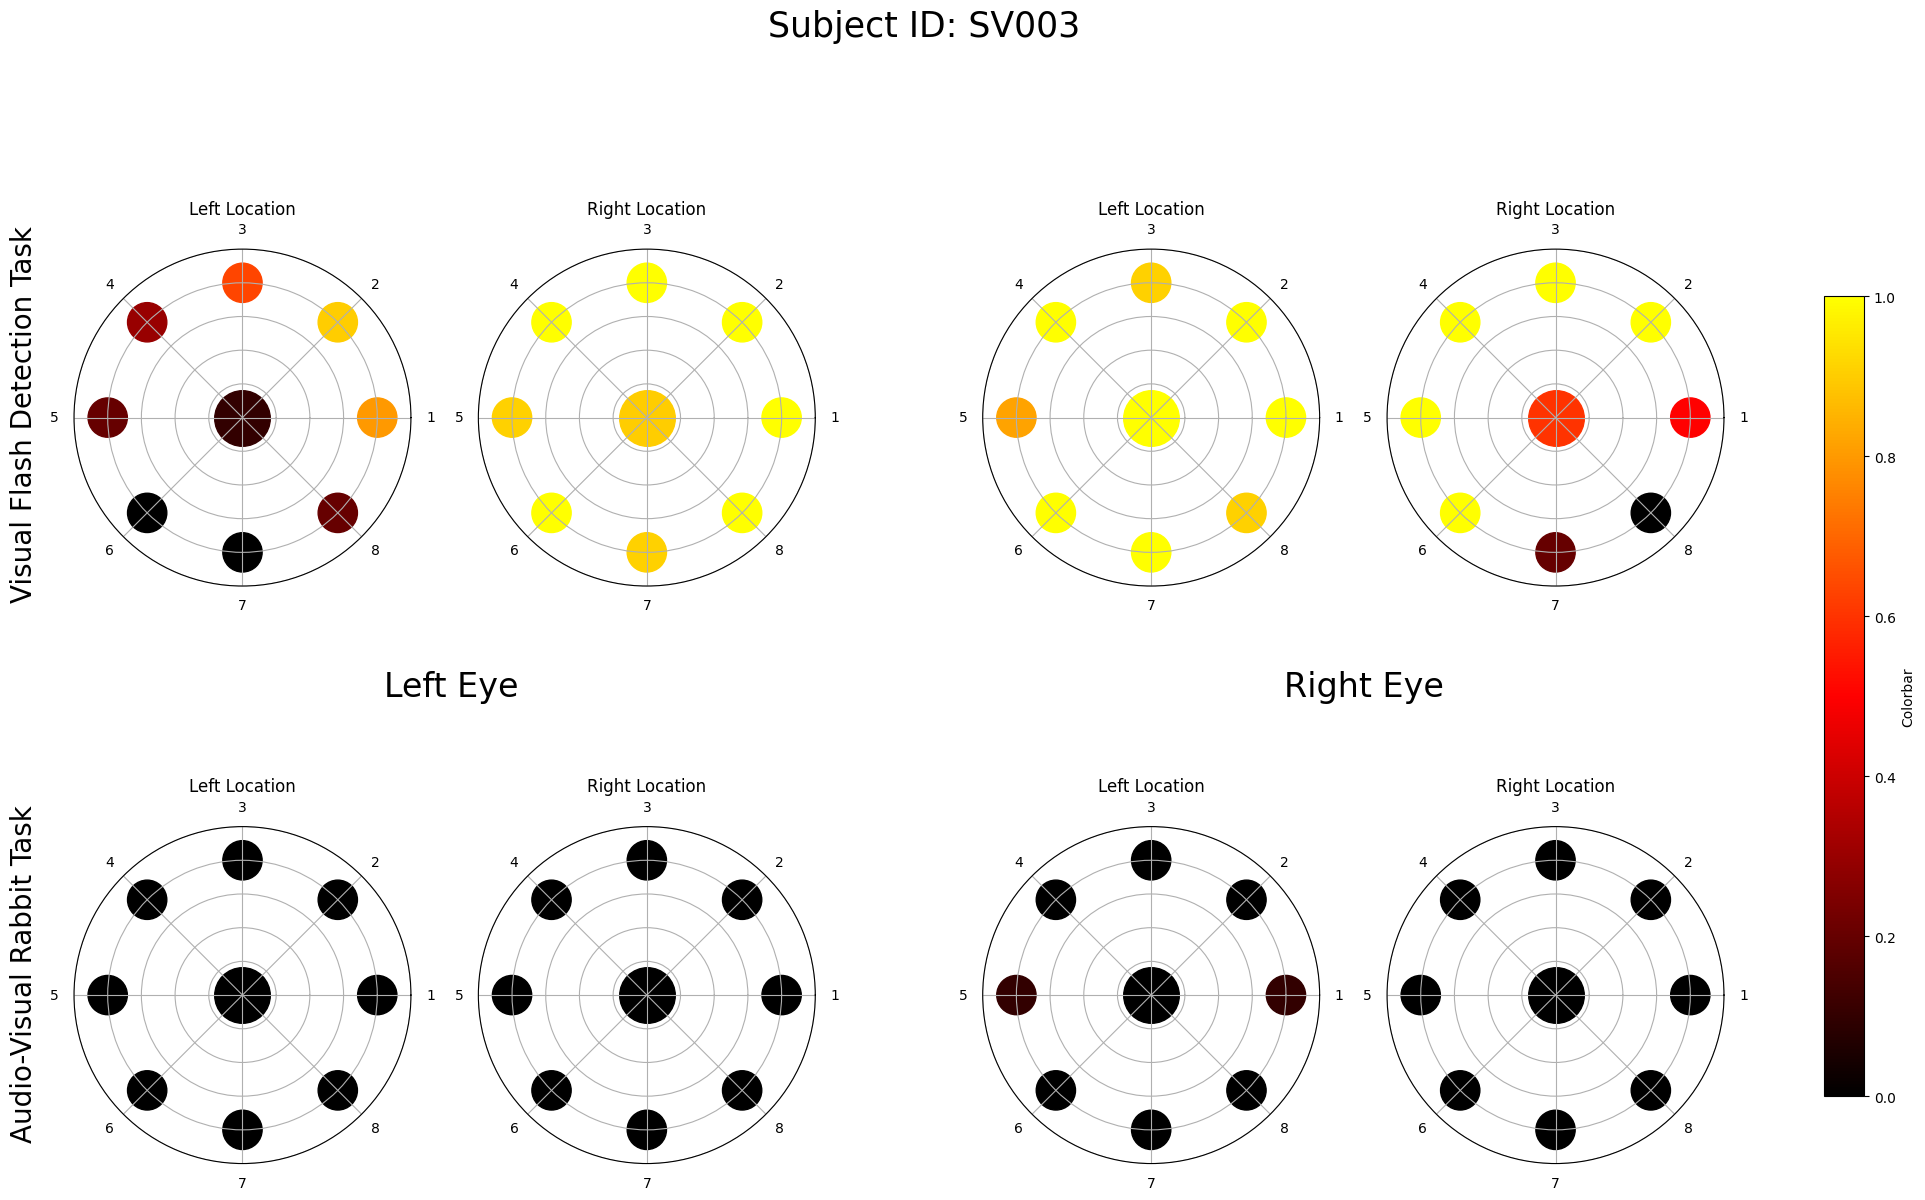

In [29]:
# Plot goes (1-8) from 0 to 360 counter-clockwise
# Positioning of circLocations
dt_Lpos = bum_dt(dt_L)
dt_Rpos = bum_dt(dt_R)
dt_Rorder = [2,1,0,7,6,5,4,3]
dt_Lorder = [14,15,8,9,10,11,12,13]
bs_R = 17
bs_L = 16

# Positioning of Sequence
av_Lpos = bum_av(av_L)
av_Rpos = bum_av(av_R)
av_Rorder = [5,2,0,6,4,3,1,7]
av_Lorder = [13,15,8,10,12,14,9,11]

#Switch positionings for (Left Eye, Right Pos) & (Right Eye, Left Pos)
color_dtRr = [dt_Rpos[key]['onep'] for key in dt_Rorder]
color_dtRl = [dt_Rpos[key]['onep'] for key in dt_Lorder]
color_dtLl = [dt_Lpos[key]['onep'] for key in dt_Lorder]
color_dtLr = [dt_Lpos[key]['onep'] for key in dt_Rorder]

color_bsRr = dt_Rpos[bs_R]['onep']
color_bsRl = dt_Rpos[bs_L]['onep']
color_bsLl = dt_Lpos[bs_L]['onep']
color_bsLr = dt_Lpos[bs_R]['onep']

color_avRr = [av_Rpos[key]['threep'] for key in av_Rorder]
color_avRl = [av_Rpos[key]['threep'] for key in av_Lorder]
color_avLl = [av_Lpos[key]['threep'] for key in av_Lorder]
color_avLr = [av_Lpos[key]['threep'] for key in av_Rorder]

angles = np.linspace(0, 2*np.pi, 8, endpoint=False)
r = 2
area = 200 * r**2
bs_area = 400 * r**2
cmap = mpl.colors.LinearSegmentedColormap.from_list('CustomMap', ['black', 'red', 'yellow'])

fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(2, 4, figure=fig, hspace=-0.4)
fig.set_figheight(20)
fig.set_figwidth(20)
fig.text(0.55, 0.83, f'Subject ID: {subject_id}', fontsize=25, ha='center')
fig.text(0.1, 0.55, 'Visual Flash Detection Task', fontsize=20, ha='center', rotation='vertical')
fig.text(0.1, 0.28, 'Audio-Visual Rabbit Task', fontsize=20, ha='center', rotation='vertical')
fig.text(0.28, 0.5, 'Left Eye', fontsize=24)
fig.text(0.73, 0.5, 'Right Eye', fontsize=24)

axs = []
ax00 = fig.add_subplot(gs[0, 0], projection='polar')
ax01 = fig.add_subplot(gs[0, 1], projection='polar')
ax02 = fig.add_subplot(gs[0, 2], projection='polar')
ax03 = fig.add_subplot(gs[0, 3], projection='polar')
ax10 = fig.add_subplot(gs[1, 0], projection='polar')
ax11 = fig.add_subplot(gs[1, 1], projection='polar')
ax12 = fig.add_subplot(gs[1, 2], projection='polar')
ax13 = fig.add_subplot(gs[1, 3], projection='polar')
axs.extend([ax00, ax01, ax02, ax03, ax10, ax11, ax12, ax13])

for ax in axs:
    ax.set_ylim(0, r + 0.5)
    ax.set_yticklabels([])
    ax.set_xticks(angles)
    ax.set_xticklabels(range(1, 9))

titles = ['Left Location', 'Right Location'] * 4
for ax, title in zip(axs, titles):
    ax.set_title(title)

# Detection Tasks
ax00.scatter(angles, np.full_like(angles, r), c=color_dtLl, s=area, cmap=cmap, vmin=0, vmax=1)
ax01.scatter(angles, np.full_like(angles, r), c=color_dtLr, s=area, cmap=cmap, vmin=0, vmax=1)
ax02.scatter(angles, np.full_like(angles, r), c=color_dtRl, s=area, cmap=cmap, vmin=0, vmax=1)
ax03.scatter(angles, np.full_like(angles, r), c=color_dtRr, s=area, cmap=cmap, vmin=0, vmax=1)
ax00.scatter(0, 0, s=bs_area, cmap=cmap, c=color_bsLl, vmin=0, vmax=1)
ax01.scatter(0, 0, s=bs_area, cmap=cmap, c=color_bsLr, vmin=0, vmax=1)
ax02.scatter(0, 0, s=bs_area, cmap=cmap, c=color_bsRl, vmin=0, vmax=1)
ax03.scatter(0, 0, s=bs_area, cmap=cmap, c=color_bsRr, vmin=0, vmax=1)

# AV Tasks
ax10.scatter(angles, np.full_like(angles, r), c=color_avLl, s=area, cmap=cmap, vmin=0, vmax=1)
ax11.scatter(angles, np.full_like(angles, r), c=color_avLr, s=area, cmap=cmap, vmin=0, vmax=1)
ax12.scatter(angles, np.full_like(angles, r), c=color_avRl, s=area, cmap=cmap, vmin=0, vmax=1)
ax13.scatter(angles, np.full_like(angles, r), c=color_avRr, s=area, cmap=cmap, vmin=0, vmax=1)
ax10.scatter(0, 0, s=bs_area, c="black")
ax11.scatter(0, 0, s=bs_area, c="black")
ax12.scatter(0, 0, s=bs_area, c="black")
ax13.scatter(0, 0, s=bs_area, c="black")


#Adds Spacing Between Eyes
spacing = 0.05
left, bottom, width, height = gs[0, 2].get_position(fig).bounds
left2, bottom2, width2, height2 = gs[0, 3].get_position(fig).bounds
ax02.set_position([left + spacing, bottom, width, height])
ax03.set_position([left2 + spacing, bottom2, width2, height2])
left3, bottom3, width3, height3 = gs[1, 2].get_position(fig).bounds
left4, bottom4, width4, height4 = gs[1, 3].get_position(fig).bounds
ax12.set_position([left3 + spacing, bottom3, width3, height3])
ax13.set_position([left4 + spacing, bottom4, width4, height4])


cbar_ax = fig.add_axes([1, 0.3, 0.02, 0.4])
cbar = fig.colorbar(ax00.collections[0], cax=cbar_ax)
cbar.set_label('Colorbar')

plt.show()

fig.savefig(f'polar_raw_{subject_id}.png', bbox_inches='tight', dpi=300)